In [2]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

import solvers
import utils
import generators

def get_torus_obs_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)

def get_torus_evo_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.full_state_observable, initial_state, num_col)


### Apply Arnoldi algorithm to the identity matrix $\begin{pmatrix}1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1\end{pmatrix}$

Eigenvalue
[1.+0.j]


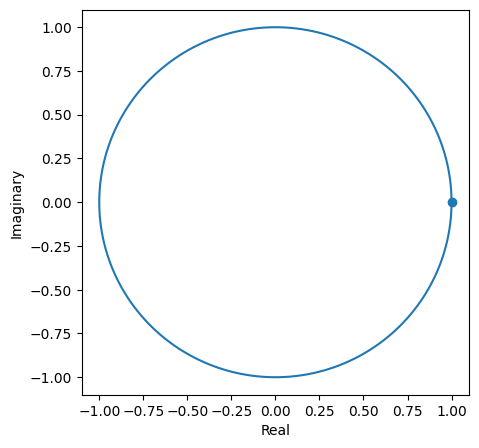

In [3]:
utils.apply_arnoldi_and_plot(np.identity(3))

### Apply Arnoldi algorithm for eigenvalue 1 and -1 $\begin{pmatrix}1 & 0\\ 0 & -1\end{pmatrix}$

Eigenvalue
[ 1.+0.j -1.+0.j]


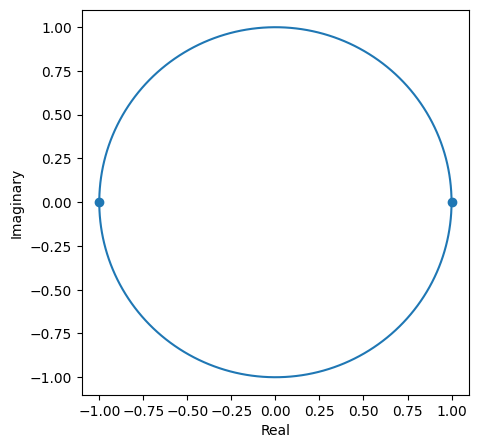

In [4]:
utils.apply_arnoldi_and_plot(np.diag([1, -1]))

### Apply Arnoldi algorithm to the matrix whose eigenvalues are 1, 1, -1 i.e. $\begin{pmatrix}1 & 0 & 0\\ 0 & -1 & 0\\ 0 & 0 & 1\end{pmatrix}$

Eigenvalue
[ 1.+0.j -1.+0.j]


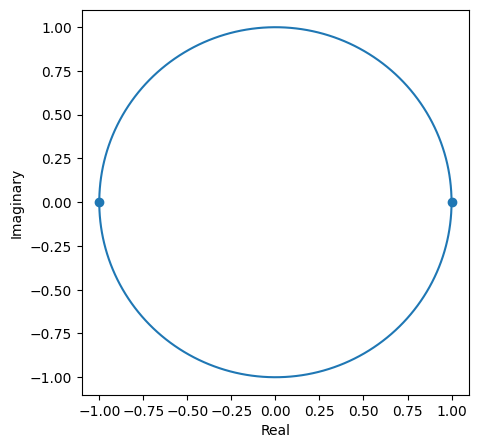

In [5]:
utils.apply_arnoldi_and_plot(np.diag([1, -1, 1]))

### Apply Arnoldi algorithm to the matrix whose eigenvalues has absolute value 1

Eigenvalue
[ 1.+0.j  0.+1.j  0.-1.j -1.-0.j]


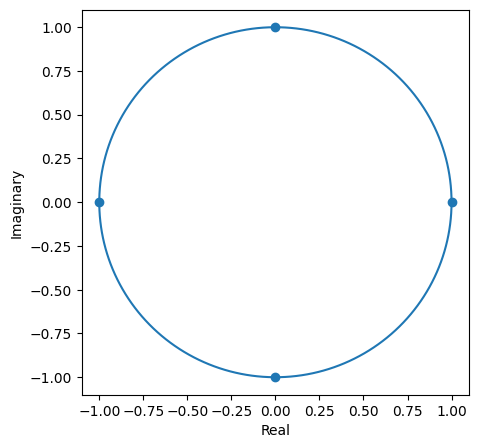

In [6]:
utils.apply_arnoldi_and_plot(np.diag([1, -1, 1j, -1j]))

### Apply Arnoldi algorithm to the matrix whose eigenvalues has absolute value 1 (not diagonal)

In [7]:
U = np.array([[1/2, -1/2, -1/2, 1/2],
              [1/2, 1/2, 1/2, 1/2],
              [1/2, 1/2, -1/2, -1/2],
              [1/2, -1/2, 1/2, -1/2],])
U.T @ U

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
step = np.sqrt(2) * np.pi
eigenvalues = [1j * np.sin(t * step) + np.cos(t * step)
               for t in range(U.shape[0])]
A = U.T @ np.diag(eigenvalues) @ U
print("eigenvalues")
print(eigenvalues)
print("A")
print(A)

eigenvalues
[(1+0j), (-0.2662553420414156-0.9639025328498773j), (-0.8582161856688175+0.5132883971570619j), (0.7232646301628758+0.6905709773479903j)]
A
[[ 0.14969828+0.05998921j -0.71193404-0.28529628j  0.07880637-0.19665499j
   0.21717405-0.54194048j]
 [-0.71193404-0.28529628j  0.14969828+0.05998921j  0.21717405-0.54194048j
   0.07880637-0.19665499j]
 [ 0.07880637-0.19665499j  0.21717405-0.54194048j  0.14969828+0.05998921j
  -0.71193404-0.28529628j]
 [ 0.21717405-0.54194048j  0.07880637-0.19665499j -0.71193404-0.28529628j
   0.14969828+0.05998921j]]


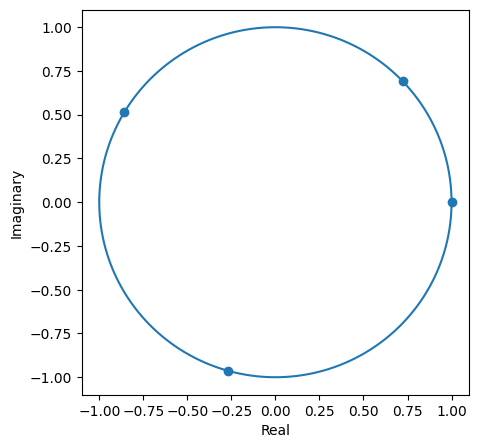

In [9]:
utils.plot_complex_on_unit_circle(eigenvalues)

Eigenvalue
[-0.3-1.j  -0.9+0.5j  0.7+0.7j  1. -0.j ]


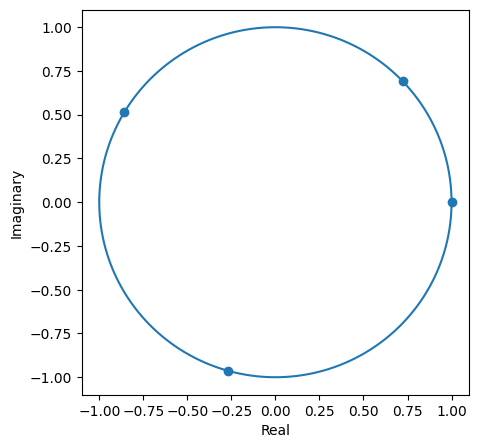

In [10]:
utils.apply_arnoldi_and_plot(A)